In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
new_df = df.iloc[:, [3,4]].values

In [7]:
from sklearn.cluster import KMeans
wcss = []

In [8]:
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

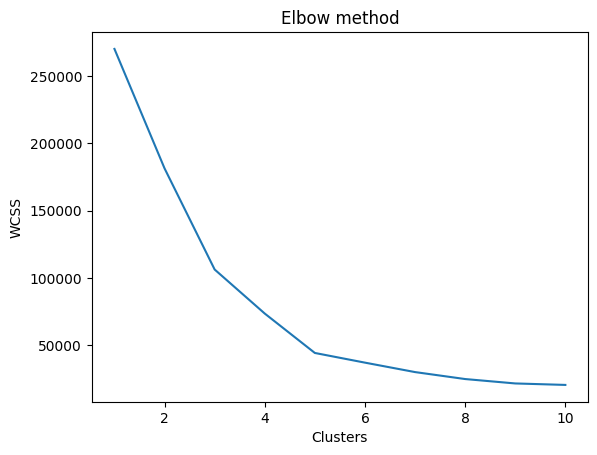

In [9]:
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeansmodel = KMeans(n_clusters=5, init='k-means++', random_state=0)

In [13]:
y_kmeans = kmeansmodel.fit_predict(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


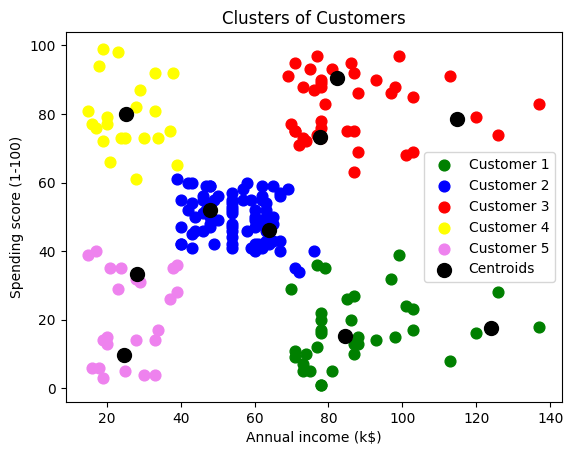

In [16]:
plt.scatter(new_df[y_kmeans == 0,0],
            new_df[y_kmeans == 0,1],
            s=60, c = 'green', label='Customer 1')
plt.scatter(new_df[y_kmeans == 1,0],
            new_df[y_kmeans == 1,1],
            s=60, c = 'blue', label='Customer 2')
plt.scatter(new_df[y_kmeans == 2,0],
            new_df[y_kmeans == 2,1],
            s=60, c = 'red', label='Customer 3')
plt.scatter(new_df[y_kmeans == 3,0],
            new_df[y_kmeans == 3,1],
            s=60, c = 'yellow', label='Customer 4')
plt.scatter(new_df[y_kmeans == 4,0],
            new_df[y_kmeans == 4,1],
            s=60, c = 'violet', label='Customer 5')

#Cluster Centers
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=100, c='black', label='Centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()